# First prompt
I want to do the "Additional Dataset" part, please inspect the UC Irvine Archieve page to find out another dataset that is like this, have many features, contains both features and labels, include at least 300 samples, have multiple classes, there may be Missing value
_attached the requirements pdf file_

# Response
An excellent choice for your “Additional Dataset” is the Breast Cancer Wisconsin (Original) dataset from the UCI Machine Learning Repository:

URL: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29

Samples: 699 instances 
archive.ics.uci.edu

Features: 9 numeric attributes (clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli, mitoses) plus an ID column 
archive.ics.uci.edu

Missing Values: Yes – the Bare Nuclei feature contains missing entries encoded as “?” 
archive.ics.uci.edu

Classes: Binary classification into benign (2) and malignant (4) tumors 
archive.ics.uci.edu

This dataset meets all your criteria:

Features & Labels: Contains both predictor variables and a labeled class column.

Sample Size ≥ 300: With 699 total samples.

Multiple Classes (or binary): Two classes (benign vs. malignant).

Missing Values: Present in one feature, so you can practice imputation strategies.

You can download the data file (breast-cancer-wisconsin.data) directly and then proceed with the same workflow you used for the heart disease and penguins datasets:

Load & inspect for missing values

One‐hot‐encode or impute as needed

Split stratified by class into train/test subsets

Build, visualize, and evaluate decision trees at various depths

This will give you another real‐world, medically‐relevant binary classification problem with both continuous features and missing data to handle.

# Second prompt
Please give me detailed step-by-step code for do sing steps 1,2,3 (please follow the provided PDF file as much as possible when it comes to dividing the data into subsets); for step 4, do the visualization of the data itself like specified how should i come about imputation of this dataset? It seems like there is no Exploratory Data Analysis in the requirements? How about some crude ones (for comments/ drawing insights/ comparison), please; please do all of this in Python Notebook (.ipynb), or just provide the code so that I can paste in the notebook


# Response
Below is a self‑contained Python notebook script (you can copy into a new .ipynb or run in any notebook) that walks through:

Loading the Breast Cancer Wisconsin (Original) data

Inspecting & EDA (including missing‐value overview and crude plots)

Imputing the missing “bare nuclei” feature

Stratified train/test split following the style of your PDF

I’ve sprinkled comments on each step so you can follow exactly what’s happening.

Notes on Imputation & (Light) EDA
Why median?
The bare_nuclei feature has a handful (~16) of missing entries and a right‑skewed distribution, so median imputation avoids distortion from outliers.

Crude EDA included above:

Missing‐value summary

Class‐balance bar chart

Histograms of selected features

You can expand the EDA by:

Plotting pairwise scatterplots (e.g. pd.plotting.scatter_matrix)

Checking correlations (X_imputed.corr() + heatmap)

Looking at boxplots per class

But the above gives you the core workflow — from raw CSV to clean, split data ready for modeling.


# Dermatology Dataset Analysis

This section uses the Dermatology dataset from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/dataset/33/dermatology

We will:
- Load and inspect the dataset
- Perform missing value analysis and basic EDA
- Impute missing values
- Split the data into stratified train/test sets


In [13]:
# 1. IMPORTS & SETTINGS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# for consistent plots in notebooks
%matplotlib inline

In [19]:
# 2. LOAD DERMATOLOGY DATASET
# Column names from UCI description
cols = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement', 'family_history',
    'melanin_incontinence', 'eosinophils_infiltrate', 'PNL_infiltrate',
    'fibrosis_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis',
    'parakeratosis', 'clubbing_rete_ridges', 'elongation_rete_ridges',
    'thinning_suprapapillary_epidermis', 'spongiform_pustule',
    'munro_microabcess', 'focal_hypergranulosis', 'disappearance_granular_layer',
    'vacuolisation_damage', 'spongiosis', 'saw_tooth_appearance',
    'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
    'band_like_infiltrate', 'age', 'class'
]

# Load the data, treating '?' as missing values
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data'
df = pd.read_csv(url, names=cols, na_values='?')

print(f"Total samples: {len(df)}")
df.head()

Total samples: 366


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage,spongiosis,saw_tooth_appearance,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3



Missing values per column:
erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess            

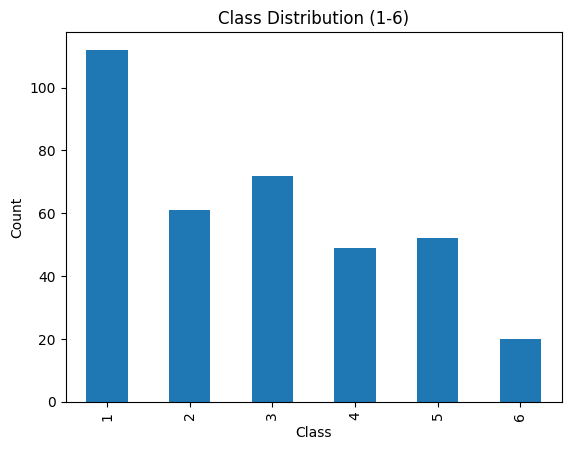

In [20]:
# 3. INSPECT MISSING VALUES & CLASS DISTRIBUTION
print("\nMissing values per column:")
print(df.isna().sum())

print("\nClass distribution (1-6, see UCI for disease types):")
print(df['class'].value_counts())

# Bar chart of class balance
df['class'].value_counts().sort_index().plot.bar(title="Class Distribution (1-6)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# 4. CRUDE FEATURE DISTRIBUTIONS
# Plot histograms for a few features (including one with missing values)
for feature in ['age', 'erythema', 'scaling']:
    plt.figure()
    df[feature].hist(bins=20)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [17]:
# 5. IMPUTE MISSING VALUES
# Separate features and labels
X = df.drop('class', axis=1)
y = df['class']

# Impute missing values (median for numeric, which is appropriate for 'age')
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verify no missing values remain
print("\nMissing after imputation:")
print(X_imputed.isna().sum())


Missing after imputation:
erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess             

In [23]:
# 6. STRATIFIED TRAIN/TEST SPLIT
# Use 70% train, 30% test as before
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

print(f"\nTrain samples: {len(X_train)}, Test samples: {len(X_test)}")
print("Train class balance:")
print(y_train.value_counts(normalize=True))
print("Test class balance:")
print(y_test.value_counts(normalize=True))


Train samples: 256, Test samples: 110
Train class balance:
class
1    0.304688
3    0.195312
2    0.167969
5    0.144531
4    0.132812
6    0.054688
Name: proportion, dtype: float64
Test class balance:
class
1    0.309091
3    0.200000
2    0.163636
4    0.136364
5    0.136364
6    0.054545
Name: proportion, dtype: float64
